# **Optimization for Deep learning**

**Author** : Ryan BOUSTANY

**Session 3:**
- Train a LeNet5 network with MNIST datatset

This tutorial aims to provide a comprehensive understanding of Convolutional Neural Networks (CNNs), primarily focusing on the implementation of LeNet-5 using the MNIST dataset. 


Convolutional Neural Networks (CNNs) are a class of deep neural networks highly effective in tasks related to image recognition, image classification, and similar types of problems. LeNet-5, proposed by Yann LeCun in 1998, is one of the pioneering models in this domain. This tutorial will walk you through the process of implementing LeNet-5 using PyTorch.

### 1. Importing Required Libraries

Let's start by importing the libraries we'll need.

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt


### 2. Data Preparation

The MNIST dataset is commonly used for handwritten digit classification and consists of 60,000 training images and 10,000 testing images.

In [2]:
# Define the transform operation to normalize the images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the MNIST dataset for training and testing
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
testloader = DataLoader(testset, batch_size=32, shuffle=False)


### 3. Understanding LeNet-5 Architecture
LeNet-5 consists of the following layers:

- Convolutional Layer 1: 6 output channels, 5x5 kernel
- Activation: Tanh
- Average Pooling
- Convolutional Layer 2: 16 output channels, 5x5 kernel
- Activation: Tanh
- Average Pooling
- Fully Connected Layer 1: 120 units
- Fully Connected Layer 2: 84 units
- Fully Connected Layer 3 (Output Layer): 10 units

In [3]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        # Define the convolutional layers
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # Define the fully connected layers
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        # Implement the forward pass
        x = torch.tanh(self.conv1(x))
        x = nn.AvgPool2d(2, stride=2)(x)
        x = torch.tanh(self.conv2(x))
        x = nn.AvgPool2d(2, stride=2)(x)
        x = x.view(-1, 16 * 4 * 4)
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x


### 4. Model Training

Loss Function and Optimizer : we will use Cross-Entropy Loss and the SGD optimizer for training.

In [4]:
# Initialize the model, loss, and optimizer
model = LeNet5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Implement the training loop with tqdm
for epoch in tqdm(range(10), desc="Epochs"):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


Epochs: 100%|██████████| 10/10 [01:58<00:00, 11.83s/it]


### 5. Model Evaluation

After training, we evaluate the model's performance on the test dataset.

In [5]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model on the 10000 test images: {100 * correct / total}%')


Accuracy of the model on the 10000 test images: 97.77%


### 6. Training Function with Different Optimizers

See to see optimizers algorithms : https://pytorch.org/docs/stable/optim.html

In [8]:
def train_lenet5_with_optimizers(optimizers_dict, num_epochs=10):
    loss_history = {}
    
    for opt_name, opt in optimizers_dict.items():
        print(f"Training with {opt_name}...")
        model = LeNet5()
        criterion = nn.CrossEntropyLoss()
        optimizer = opt(model.parameters(), lr=0.001)
        
        loss_history[opt_name] = []
        
        for epoch in tqdm(range(num_epochs), desc=f"Epochs ({opt_name})"):
            epoch_loss = 0.0
            for i, data in enumerate(trainloader):
                inputs, labels = data
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()
            loss_history[opt_name].append(epoch_loss / len(trainloader))
    
    # Plotting the loss curves
    for opt_name, losses in loss_history.items():
        plt.plot(range(1, num_epochs + 1), losses, label=f"{opt_name}")
        
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Optimizer Comparison: Training Loss')
    plt.legend()
    plt.show()

# Define the optimizers to be compared
optimizers_dict = {
    'Adam': optim.Adam,
    'SGD': optim.SGD,
    'RMSprop': optim.RMSprop
}

Training with Adam...


Epochs (Adam): 100%|██████████| 10/10 [01:46<00:00, 10.70s/it]


Training with SGD...


Epochs (SGD): 100%|██████████| 10/10 [01:40<00:00, 10.05s/it]


Training with RMSprop...


Epochs (RMSprop): 100%|██████████| 10/10 [01:46<00:00, 10.62s/it]


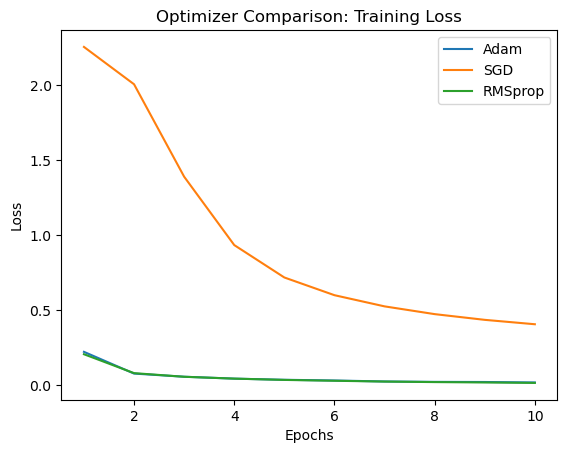

In [9]:
# Train and compare
train_lenet5_with_optimizers(optimizers_dict)

Based on the observed training loss curves, is there an optimizer that exhibits faster convergence than Stochastic Gradient Descent (SGD)? 